# Multimodality with Image Generation & Captioning

> Adapted from `A3` and class notebooks, Generative AI Course - Spring 2024 (DATASCI 290) at MIDS, UC Berkeley - Course Developed by Mark Butler & Joachim Rahmfeld

We will look at the simple task of image generation and use a number of tools to see how we could evaluate the accuracy of the image generation process.

The structure of the Assignment is as follows:

1. **Image Generation**  

   Here we will explore how the stable diffusion model generates inmages conditioned on a text prompt.

2. **Image Classification**

   Here we will use CLIP to evaluate captions that describe our images to see which labels most accurately describes our generated images.

3. **Image Captioning**

   We will then use both BLIP to generate a caption for our image and then use CLIP to measure how well the compares with other descriptive sequences.

4. **Image Evaluation**

   We will also use a visual question answering system to ask questions about our generated image.  In our prompt we asked for certain items in the image.  In the question answering system we can ask if those items are present in the image.  Finally, we will also look at a Multimodal Large Language Model to see how it describes our image and to see how close/far that is from the prompt we provided.


**Models we'll use in this exercise**

**Stable Diffusion** - generate image from prompt

**CLIP** - compare "text" labels with image

**BLIP** - given image generate a caption

**VQA** - answer questions about image

**Llava** - Multimodal LLM


We'll need to use Google Drive to store the images we generate because we want to reuse them. You will need to edit the file path for the output folder variable below.  I'm using Colab Pro on my personal account and so have created a '290' folder in MyDrive where I can store the images I want to keep in this assignment.

In [ ]:
#mount Google Drive
import os
from google.colab import drive
drive.mount('/content/drive')

# Define your directory
output_folder = "/content/drive/MyDrive/290/2024-spring/TestNotebooks/"

# Ensure the output directory exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setup

In [ ]:
!pip install -q diffusers --upgrade
!pip install -q invisible_watermark transformers accelerate safetensors

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

## Stable Diffusion - Generate Images with one object

We're going to generate an image using stable diffusion ([Model Card](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0)). You will specify a prompt with one object.  Be sure to specify that you want one. I used "portrait of a dog in a chair"  How can we programatically tell if the generated image follows our prompt?  We can use some other tools that can examine the photo and tell if it's contents are what we asked for or if the generator fell short.




In [ ]:
from diffusers import DiffusionPipeline
import torch

sd_pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
sd_pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "A laptop on a desk"
images = sd_pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

**QUESTION:**

1.a. What is the prompt you gave to generate the image with the single object? `A laptop on a desk`

Now save the image in your google drive so that when you find one you like you can re-use in subsequent steps.  We'll ask you to put the `test_single.png` image you use into your a3 assignment folder so it becomes part of your submission.

In [ ]:
# images.save("test.png")
filename = output_folder + "/test_single.png"
images.save(filename)

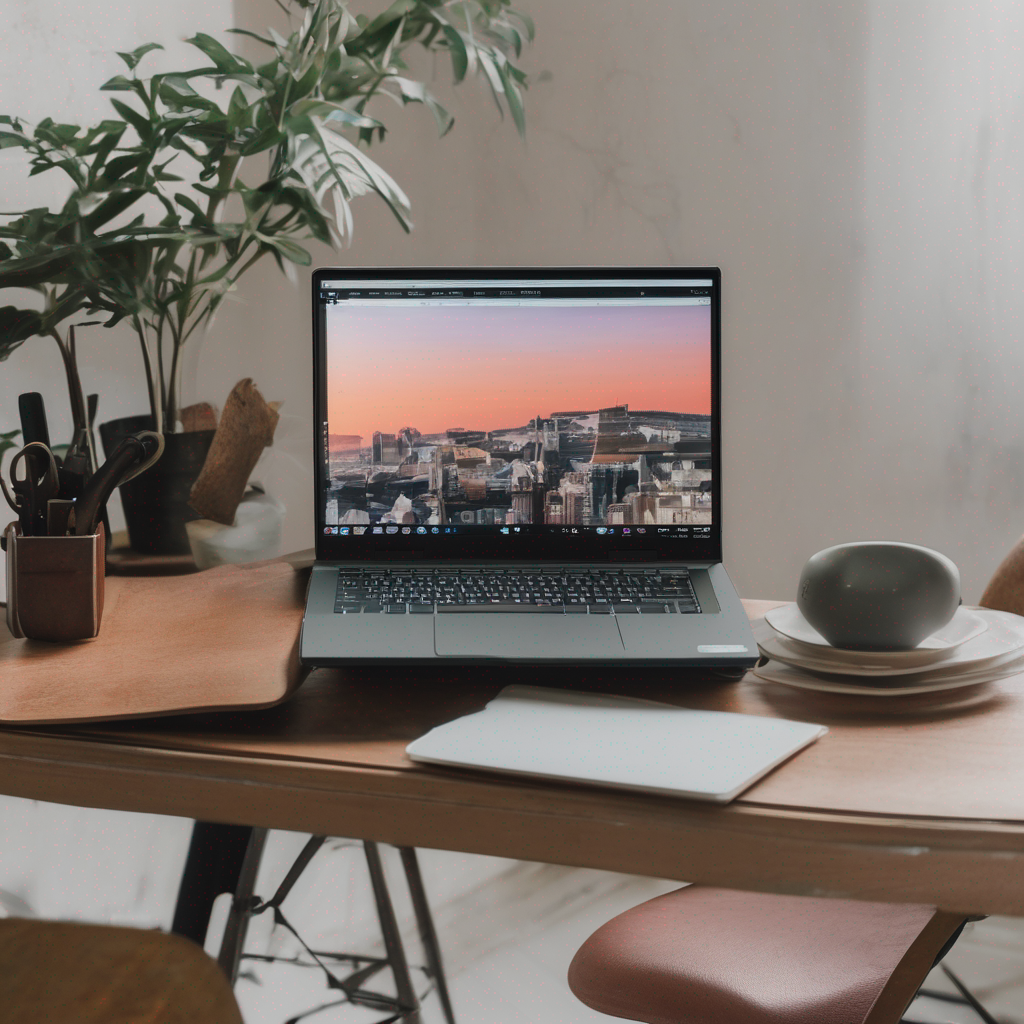

In [ ]:
images

## CLIP - evaluate image with one object

Now we'll use the CLIP model ([Model Card](https://huggingface.co/openai/clip-vit-base-patch32)) to see if our image resembles the object in the prompt.  You'll need to edit the list of captions below.  One label in the list should be the object.  Other labels can be similiar objects and one should be orthogonal (very differnt from your chosen object).




In [ ]:
!pip install -q transformers
!pip install -q Pillow

In [ ]:
import io
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

In [ ]:
%%capture
cl_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
cl_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
img_url = '/content/drive/MyDrive/290/2024-spring/TestNotebooks/test_single.png'
raw_image = Image.open(img_url, mode='r')

In [ ]:
captions = [
    "workplace",
    "laptop on a desk",
    "laptop on a pony",
    "laptop on the street",
    "desktop on a desk",
    "a polar bear under a warm fire",
]

inputs = cl_processor(
    text=captions,
    images=raw_image,
    return_tensors="pt",
    padding=True,
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(
    dim=1
)  # we can take the softmax to get the label probabilities


print()
for i, caption in enumerate(captions):
    print("%40s - %.4f" % (caption, probs[0, i]))
print()
print()


                               workplace - 0.0276
                        laptop on a desk - 0.7223
                        laptop on a pony - 0.0146
                    laptop on the street - 0.0090
                       desktop on a desk - 0.2264
          a polar bear under a warm fire - 0.0000




**QUESTION:**

1.b. What are the captions you gave to evaluate the image?

```python
captions = [
    "workplace",
    "laptop on a desk",
    "laptop on a pony",
    "laptop on the street",
    "desktop on a desk",
    "a polar bear under a warm fire"
]
```

**QUESTION:**

1.c. What is the correct caption and the score assigned to it by the CLIP model?

`laptop on a desk` - `0.7223`



## Stable Diffusion -  Object Counts

We're going to generate another image using stable diffusion.  For this new image you will specify a prompt with 3 of the same object (Type 1), 2 of a different kind of object (Type 2) "in the background", and two other individual objects (Type 3) (Type 4) in the scene.  For example `3 cats in the garden with 2 snakes in the background with a flowering tree and a rose bush`.

How can we programatically tell if the generated image follows our prompt?  We can use some other tools that can examine the photo and tell if it's contents are what we asked for or if the generator fell short.

Note that each time you run this cell you generate a new image. YOu may want to try several images before you select one for future processing.

**QUESTION:**

1.d. What is the prompt you gave to generate the image?

In [ ]:
prompt = """
THREE (3) squirrels in the foreground, and TWO (2) BIRDS in the background.
Also illustrate ONE (1) CLOUD and ONE (1) active VOLCANO.
Don't include extra clouds, extra birds or extra squirrels anywhere else in the result.
"""

images = sd_pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Now make sure you save the image you generate and want to work with as `test_counts.png`.  You will need to submit that image in your a3 directory.

In [ ]:

filename = output_folder + "/test_counts.png"
images.save(filename)

## CLIP - evaluate your image

Now let's use CLIP again to see if your image has the correct number of of Type 1 objects, tht is the number you specified in your prompt.  Generate a set of four CLIP captions that asks about how many Type 1 objects are in the image.


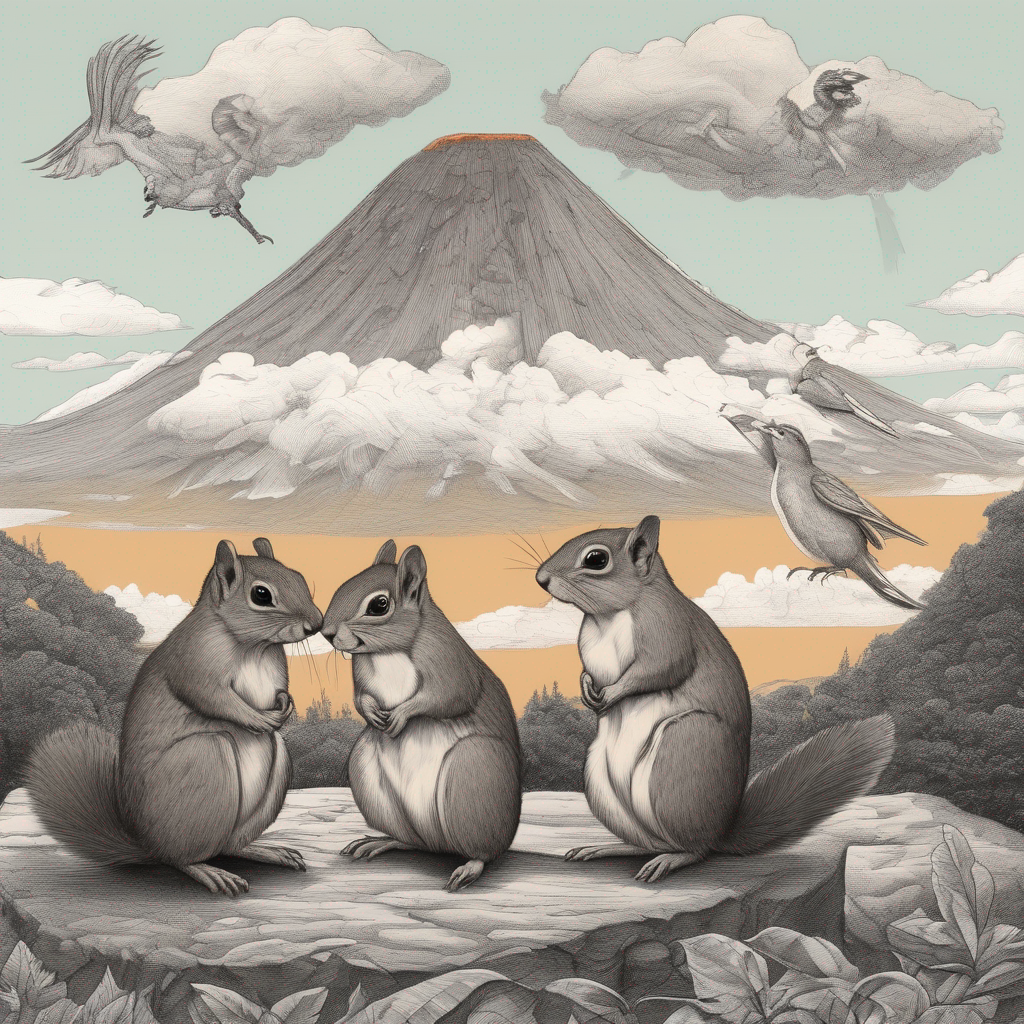

In [ ]:
from PIL import Image
img_url = '/content/drive/MyDrive/290/2024-spring/TestNotebooks/test_counts.png'
raw_image = Image.open(img_url, mode='r')
raw_image

In [ ]:
captions = [
    "3 squirrels in front of a volcano",
    "5 squirrels discussing politics",
    "10 squirrels eating nuts",
    "3 lions having dinner"
]

inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities

print()
print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()



       3 squirrels in front of a volcano - 0.9862
         5 squirrels discussing politics - 0.0126
                10 squirrels eating nuts - 0.0012
                   3 lions having dinner - 0.0000



**QUESTION:**

1.e. What is the text of your highest scoring caption? `3 squirrels in front of a volcano`

**QUESTION:**

1.f. What is the score associated with the highest scoring caption `0.98`

## BLIP - create text with captioning

BLIP [Model card](https://huggingface.co/Salesforce/blip-image-captioning-large) is a model from Salesforce research that take an image as input and generate a matching text caption.  We'll use that functionality to run our generated image through and see how the output compares wth our prompt.


In [ ]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [ ]:
bl_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
bl_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large", torch_dtype=torch.float16).to("cuda")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [ ]:
img_url = '/content/drive/MyDrive/290/2024-spring/TestNotebooks/test_counts.png'

raw_image = Image.open(img_url, mode='r')


In [ ]:
# unconditional image captioning
inputs = bl_processor(raw_image, return_tensors="pt").to("cuda", torch.float16)

out = bl_model.generate(**inputs)
print(bl_processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


there are three squirrels sitting on a rock in front of a mountain


**QUESTION:**

1.g. What is the caption generated by BLIP to describe the stable diffusion image you fed to it?
`there are three squirrels sitting on a rock in front of a mountain`


## Test BLIP Caption with CLIP

Copy the unconditional BLIP caption into the captions you provide CLIP and add three other possibilities so you can generate some scores.  These labels are an opportunity to how see well CLIP can pick out the details of your generated image.  



In [ ]:
from PIL import Image
img_url = '/content/drive/MyDrive/290/2024-spring/TestNotebooks/test_counts.png'
raw_image = Image.open(img_url, mode='r')

In [ ]:
captions = [
    "there are three squirrels sitting on a rock in front of a mountain", # blip caption
    "three squirrels, one volcano, two birds and one cloud", # my caption shortened
    "three lions having dinner",
    "five squirrels sitting on a rock"
]


inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities

print()
print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()




there are three squirrels sitting on a rock in front of a mountain - 0.5626
three squirrels, one volcano, two birds and one cloud - 0.4121
               three lions having dinner - 0.0000
        five squirrels sitting on a rock - 0.0252



**QUESTION:**

1.h. What are the 3 captions you added for the classification with CLIP?

1. `three squirrels, one volcano, two birds and one cloud` # my caption shortened
2. `three lions having dinner`
3. `five squirrels sitting on a rock`

**QUESTION:**

1.i. What is the score CLIP gave to the BLIP generated caption? `0.5626`



## BLIP for Visual Question Answering

There's another variation of BLIP [Model Card](https://huggingface.co/Salesforce/blip-vqa-base) that has been designed to answer questions about the contents of an image.  We'll use that functionality to ask questions to see if the generated image corresponds to the prompt we provided.













In [ ]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base", torch_dtype=torch.float16).to("cuda")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

**QUESTION:**

1.j. How many type 1 objects does the VQA say are present in your generated image? `3` (prompt `3` actual `3`)

In [ ]:
question = "How many distinct squirrels are in the picture?"

inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

3


**QUESTION:**

1.k. How many type 2 objects does the VQA say are present in your generated image? `3` (prompt `2`, actual `3`)

In [ ]:
### YOUR CODE HERE
question = "How many distinct birds are in the picture?"
### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

3


**QUESTION:**

1.l. How many type 2 objects does the VQA say are present in the background of your generated image? `2` (prompt `2`, actual `2`)

In [ ]:
question = "How many birds are only in the background of the picture?"

inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

2


**QUESTION:**

1.m. How many type 3 objects does the VQA say are present in your generated image? `5` (prompt `1` actual `many`)

In [ ]:
question = "How many distinct clouds are present in the picture?"

inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

5


**QUESTION:**

1.n. How many type 4 objects does the VQA say are present in your generated image? `1` (prompt `1`, actual `1`)

In [ ]:
question = "How many distinct volcanoes are present in the picture?"

inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

1


## Llava - 4-bit

It's unlikely that you can run this entire notebook without consuming all of the memory resources and crashing the kernel.  Therefore, at this point you should restart the session!  You'll need to also rerun the setup section but then you can skip to this point.

Now, finally, let's use Llava, a 7 billion parameter multimodal large language model [Model Card](llava-hf/llava-1.5-7b-hf) and see how it describes the generated image saved as test_counts.png.  This model allows us to use a prompt that follows the format we see below.  You can leave the prompt as is or experiment with improving it.




In [1]:
!pip install -q transformers==4.36.0
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [3]:
#mount Google Drive
import os
from google.colab import drive
drive.mount('/content/drive')

# Define your directory
output_folder = "/content/drive/MyDrive/290/2024-spring/TestNotebooks/"

# Ensure the output directory exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

Mounted at /content/drive


In [ ]:
import requests
from PIL import Image

#load the image from the Google Drive
img_url = '/content/drive/MyDrive/290/2024-spring/TestNotebooks/test_counts.png'

raw_image = Image.open(img_url, mode='r')

In [5]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [6]:
#It takes about 3 minutes just to load the model
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

ll_pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnin

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

It is important to prompt the model wth a specific format, which is:
```bash
USER: <image>\n<prompt>\nASSISTANT:
```

In [9]:
max_new_tokens = 200
prompt = "USER: <image>\nCount and describe the objects in the image and in the background and their spatial relationship?\nASSISTANT:"

outputs = ll_pipe(raw_image, prompt=prompt, generate_kwargs={"max_new_tokens": 100})

In [10]:
print(outputs[0]["generated_text"])

USER:  
Count and describe the objects in the image and in the background and their spatial relationship?
ASSISTANT: In the image, there are three squirrels sitting on a rock. They are positioned close to each other, creating a sense of companionship. In the background, there are two birds flying in the sky, one above the other. The birds are located at a higher position in the sky, while the squirrels are situated closer to the ground. The scene captures the harmony between the animals, with the squirrels enjoying their time on the rock and


**QUESTION:**

1.o. What is the description that Llava generates of the image? `In the image, there are three squirrels sitting on a rock. They are positioned close to each other, creating a sense of companionship. In the background, there are two birds flying in the sky, one above the other. The birds are located at a higher position in the sky, while the squirrels are situated closer to the ground. The scene captures the harmony between the animals, with the squirrels enjoying their time on the rock and`

**QUESTION:**

1.p. Are there any key components that Llava missed in the image? `It missed a count of clouds and the volcano`

**QUESTION:**

1.q. What memory saving approach are we using to load this 7B parameter model into our limited GPU?
(distillation/quantization/microscopy) `quantization`